In [ ]:
import pandas as pd
from google.colab import drive
df= pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [ ]:
print(df.head)

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [ ]:
print(df.duplicated().sum())
print(df.size)

0
1000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.7500

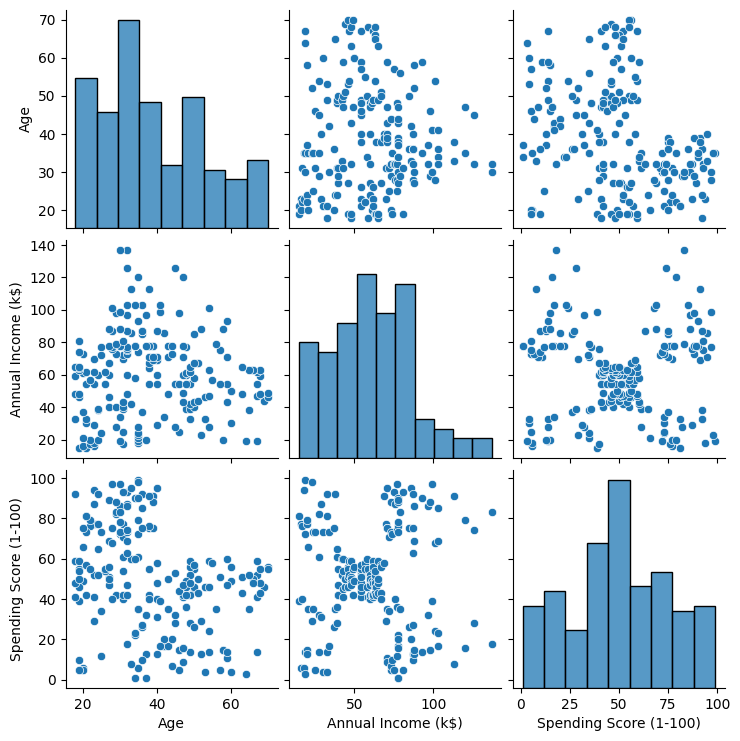

In [ ]:
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df.drop("CustomerID", axis=1))
plt.show()



In [ ]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled Features (first 5 rows):")
print(X_scaled[:5])



Scaled Features (first 5 rows):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


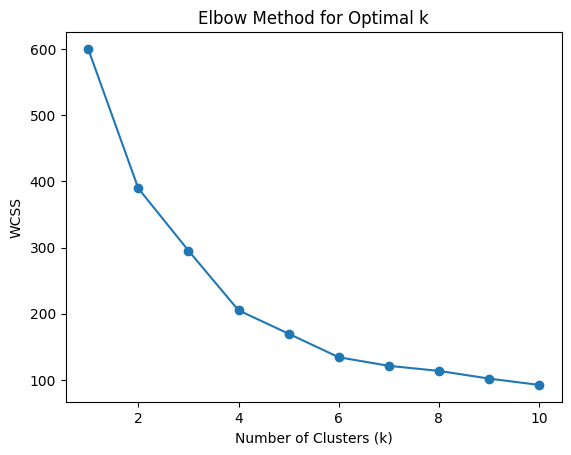

In [ ]:
# Elbow Method to find best k
from sklearn.cluster import KMeans
wcss = []  # within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:
# From elbow method, suppose we choose k=5
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = y_kmeans

print("\nClustered Data (first 5 rows):")
print(df.head())



Clustered Data (first 5 rows):
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


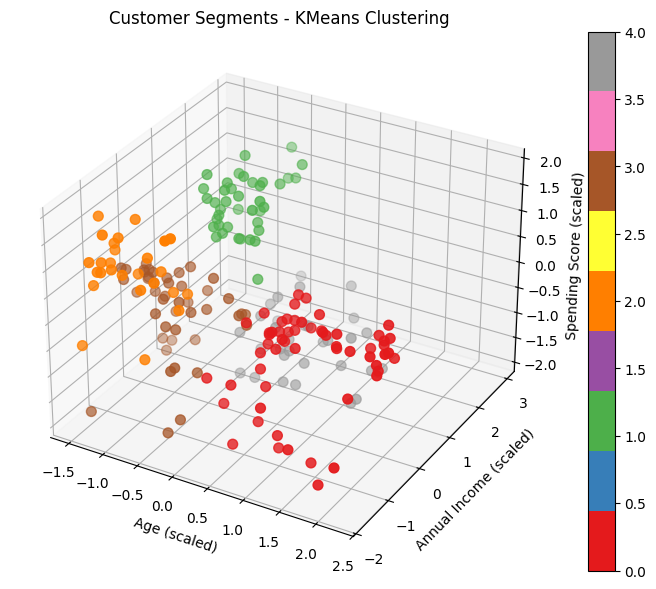

In [ ]:
# 3D Visualization of Clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
    c=y_kmeans, cmap="Set1", s=50
)

ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.set_title("Customer Segments - KMeans Clustering")
plt.colorbar(scatter)
plt.show()



Cluster Summary:

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


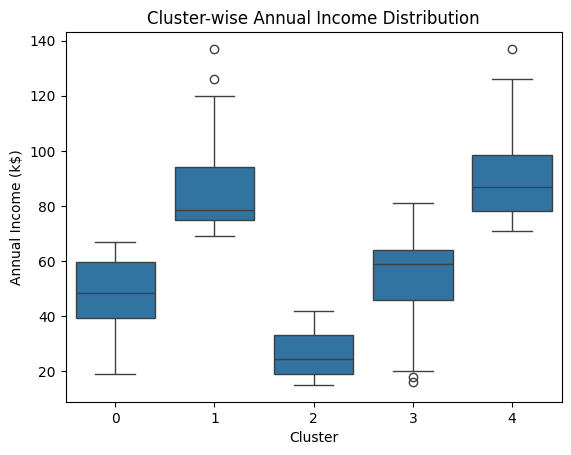

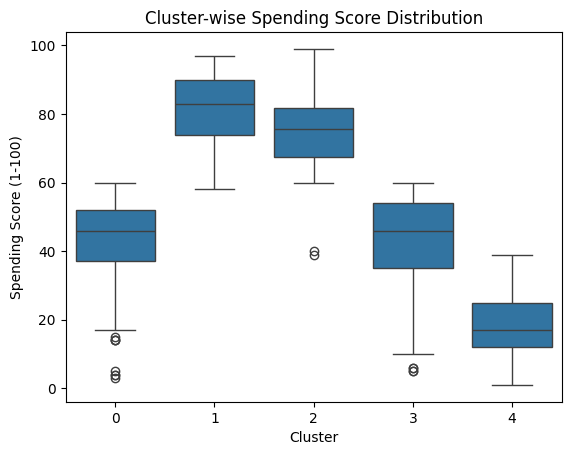

In [ ]:
# Group by cluster to understand customer segments
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nCluster Summary:\n")
print(cluster_summary)

sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df)
plt.title("Cluster-wise Annual Income Distribution")
plt.show()

sns.boxplot(x="Cluster", y="Spending Score (1-100)", data=df)
plt.title("Cluster-wise Spending Score Distribution")
plt.show()
